## Import Required Packages

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.stats import zscore
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score, accuracy_score, f1_score, recall_score, precision_score, confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
import imblearn
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import RandomOverSampler
import tensorflow as tf

## Load Dataset

In [2]:
mydata=pd.read_csv("predictive_maintenance.csv")

In [3]:
mydata.head(10000)

,date,device,failure,metric1,metric2,metric3,metric4,metric5,metric6,metric7,metric8,metric9
0,1/1/15,S1F01085,0,215630672,56,0,52,6,407438,0,0,7
1,1/1/15,S1F0166B,0,61370680,0,3,0,6,403174,0,0,0
2,1/1/15,S1F01E6Y,0,173295968,0,0,0,12,237394,0,0,0
3,1/1/15,S1F01JE0,0,79694024,0,0,0,6,410186,0,0,0
4,1/1/15,S1F01R2B,0,135970480,0,0,0,15,313173,0,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,1/11/15,S1F0LR01,0,67857096,0,0,8,9,169543,0,0,0
9996,1/11/15,S1F0M2PQ,0,67962016,0,0,6,60,233789,0,0,0
9997,1/11/15,S1F0MBV5,0,110072424,0,0,0,4,355195,0,0,0
9998,1/11/15,S1F0P1K7,0,149787232,0,0,0,2,256401,0,0,0


In [4]:
mydata.tail()

,date,device,failure,metric1,metric2,metric3,metric4,metric5,metric6,metric7,metric8,metric9
124489,11/2/15,Z1F0MA1S,0,18310224,0,0,0,10,353705,8,8,0
124490,11/2/15,Z1F0Q8RT,0,172556680,96,107,4,11,332792,0,0,13
124491,11/2/15,Z1F0QK05,0,19029120,4832,0,0,11,350410,0,0,0
124492,11/2/15,Z1F0QL3N,0,226953408,0,0,0,12,358980,0,0,0
124493,11/2/15,Z1F0QLC1,0,17572840,0,0,0,10,351431,0,0,0


In [5]:
mydata.shape

(124494, 12)

In [6]:
mydata1 = mydata.pop('failure') # remove column failure and store it in mydata1
mydata['failure']=mydata1       # add column failure as end column to mydata

## Start EDA on dataset

In [7]:
mydata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 124494 entries, 0 to 124493
Data columns (total 12 columns):
 #   Column   Non-Null Count   Dtype 
---  ------   --------------   ----- 
 0   date     124494 non-null  object
 1   device   124494 non-null  object
 2   metric1  124494 non-null  int64 
 3   metric2  124494 non-null  int64 
 4   metric3  124494 non-null  int64 
 5   metric4  124494 non-null  int64 
 6   metric5  124494 non-null  int64 
 7   metric6  124494 non-null  int64 
 8   metric7  124494 non-null  int64 
 9   metric8  124494 non-null  int64 
 10  metric9  124494 non-null  int64 
 11  failure  124494 non-null  int64 
dtypes: int64(10), object(2)
memory usage: 11.4+ MB


In [8]:
#total no of records : 124494
#Total no of columns : 12 columns
# 10 columns with integer type and 2 columns with object type

In [9]:
mydata.describe(include='all')

,date,device,metric1,metric2,metric3,metric4,metric5,metric6,metric7,metric8,metric9,failure
count,124494,124494,1.244940e+05,124494.000000,124494.000000,124494.000000,124494.000000,124494.000000,124494.000000,124494.000000,124494.000000,124494.000000
unique,304,1169,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,1/2/15,Z1F0QL3N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1163,304,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,1.223881e+08,159.484762,9.940455,1.741120,14.222669,260172.657726,0.292528,0.292528,12.451524,0.000851
std,NaN,NaN,7.045933e+07,2179.657730,185.747321,22.908507,15.943028,99151.078547,7.436924,7.436924,191.425623,0.029167
min,NaN,NaN,0.000000e+00,0.000000,0.000000,0.000000,1.000000,8.000000,0.000000,0.000000,0.000000,0.000000
25%,NaN,NaN,6.128476e+07,0.000000,0.000000,0.000000,8.000000,221452.000000,0.000000,0.000000,0.000000,0.000000
50%,NaN,NaN,1.227974e+08,0.000000,0.000000,0.000000,10.000000,249799.500000,0.000000,0.000000,0.000000,0.000000
75%,NaN,NaN,1.833096e+08,0.000000,0.000000,0.000000,12.000000,310266.000000,0.000000,0.000000,0.000000,0.000000


In [10]:
mydata.columns

Index(['date', 'device', 'metric1', 'metric2', 'metric3', 'metric4', 'metric5',
       'metric6', 'metric7', 'metric8', 'metric9', 'failure'],
      dtype='object')

In [11]:
#Check for  any null values in dataset

In [12]:
mydata.isnull().sum()

date       0
device     0
metric1    0
metric2    0
metric3    0
metric4    0
metric5    0
metric6    0
metric7    0
metric8    0
metric9    0
failure    0
dtype: int64

In [13]:
#By looking at target column values, the dataset given is imbalanced

In [14]:
mydata.groupby(["failure"]).count()

,date,device,metric1,metric2,metric3,metric4,metric5,metric6,metric7,metric8,metric9
failure,,,,,,,,,,,
0,124388,124388,124388,124388,124388,124388,124388,124388,124388,124388,124388
1,106,106,106,106,106,106,106,106,106,106,106


In [15]:
# The classes are heavily skewed so need to solve this issue.
print('Non-Failures', round(mydata['failure'].value_counts()[0]/len(mydata) * 100,2), '% of the dataset')
print('Failures', round(mydata['failure'].value_counts()[1]/len(mydata) * 100,2), '% of the dataset')

Non-Failures 99.91 % of the dataset
Failures 0.09 % of the dataset


In [16]:
#Its clearly  imbalanced dataset.
#Most of the recrods are non-failures
#If this dataframe is used as the base for our predictive models, the analysis we might get a lot of errors and 
#our algorithms will probably overfit since it will "assume" that most records are non failure.

Text(0.5, 1.0, 'failure Distributions \n (0: Non-Failure || 1: Failure)')

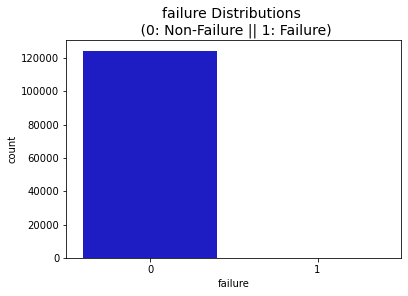

In [17]:
colors = ["#0101DF", "#DF0101"]
sns.countplot(x='failure', data=mydata, palette=colors)
plt.title('failure Distributions \n (0: Non-Failure || 1: Failure)', fontsize=14)

In [18]:
#convert the non-numberical values to categorical values
for feature in mydata.columns: # Loop through all columns in the dataframe
    if mydata[feature].dtype == 'object': # Only apply for columns with categorical strings
        mydata[feature] = pd.Categorical(mydata[feature]).codes # Replace strings with an integer

In [19]:
mydata.head()

,date,device,metric1,metric2,metric3,metric4,metric5,metric6,metric7,metric8,metric9,failure
0,0,0,215630672,56,0,52,6,407438,0,0,7,0
1,0,2,61370680,0,3,0,6,403174,0,0,0,0
2,0,3,173295968,0,0,0,12,237394,0,0,0,0
3,0,4,79694024,0,0,0,6,410186,0,0,0,0
4,0,5,135970480,0,0,0,15,313173,0,0,3,0


In [20]:
mydata.tail()

,date,device,metric1,metric2,metric3,metric4,metric5,metric6,metric7,metric8,metric9,failure
124489,61,1045,18310224,0,0,0,10,353705,8,8,0,0
124490,61,1068,172556680,96,107,4,11,332792,0,0,13,0
124491,61,1075,19029120,4832,0,0,11,350410,0,0,0,0
124492,61,1081,226953408,0,0,0,12,358980,0,0,0,0
124493,61,1082,17572840,0,0,0,10,351431,0,0,0,0


In [21]:
mydata.describe().apply(lambda s: s.apply('{0:.5f}'.format)).transpose()

,count,mean,std,min,25%,50%,75%,max
date,124494.00000,124.21836,81.94213,0.00000,66.00000,112.00000,189.00000,303.00000
device,124494.00000,622.37919,327.17780,0.00000,378.00000,602.00000,917.00000,1168.00000
metric1,124494.00000,122388103.24212,70459334.21636,0.00000,61284762.00000,122797388.00000,183309640.00000,244140480.00000
metric2,124494.00000,159.48476,2179.65773,0.00000,0.00000,0.00000,0.00000,64968.00000
metric3,124494.00000,9.94045,185.74732,0.00000,0.00000,0.00000,0.00000,24929.00000
metric4,124494.00000,1.74112,22.90851,0.00000,0.00000,0.00000,0.00000,1666.00000
metric5,124494.00000,14.22267,15.94303,1.00000,8.00000,10.00000,12.00000,98.00000
metric6,124494.00000,260172.65773,99151.07855,8.00000,221452.00000,249799.50000,310266.00000,689161.00000
metric7,124494.00000,0.29253,7.43692,0.00000,0.00000,0.00000,0.00000,832.00000
metric8,124494.00000,0.29253,7.43692,0.00000,0.00000,0.00000,0.00000,832.00000


In [22]:
# After studying the mean, median & std for all the attributes, 
# we can see for date, device, metric1, metric5, metric6 , metric7 metric8 the mean & median are close 
# Find the correlation between the attributes in the dataset.abs

In [23]:
mydata.corr()

,date,device,metric1,metric2,metric3,metric4,metric5,metric6,metric7,metric8,metric9,failure
date,1.000000,0.024541,-0.003385,-0.038476,-0.000255,-0.003069,0.013847,0.095628,0.003468,0.003468,-0.023138,0.000157
device,0.024541,1.000000,-0.002224,-0.004132,-0.041057,0.001570,-0.027156,-0.122077,-0.001385,-0.001385,-0.019503,-0.002702
metric1,-0.003385,-0.002224,1.000000,-0.004250,0.003701,0.001836,-0.003376,-0.001522,0.000151,0.000151,0.001121,0.001983
metric2,-0.038476,-0.004132,-0.004250,1.000000,-0.002617,0.146593,-0.013999,-0.026350,0.141367,0.141367,-0.002736,0.052902
metric3,-0.000255,-0.041057,0.003701,-0.002617,1.000000,0.097452,-0.006696,0.009027,-0.001884,-0.001884,0.532366,-0.000948
metric4,-0.003069,0.001570,0.001836,0.146593,0.097452,1.000000,-0.009773,0.024870,0.045631,0.045631,0.036069,0.067398
metric5,0.013847,-0.027156,-0.003376,-0.013999,-0.006696,-0.009773,1.000000,-0.017049,-0.009384,-0.009384,0.005949,0.002270
metric6,0.095628,-0.122077,-0.001522,-0.026350,0.009027,0.024870,-0.017049,1.000000,-0.012207,-0.012207,0.021152,-0.000550
metric7,0.003468,-0.001385,0.000151,0.141367,-0.001884,0.045631,-0.009384,-0.012207,1.000000,1.000000,0.006861,0.119055
metric8,0.003468,-0.001385,0.000151,0.141367,-0.001884,0.045631,-0.009384,-0.012207,1.000000,1.000000,0.006861,0.119055


In [24]:
# We can able to see good correlation between Metric3 and Metric9 

<AxesSubplot:>

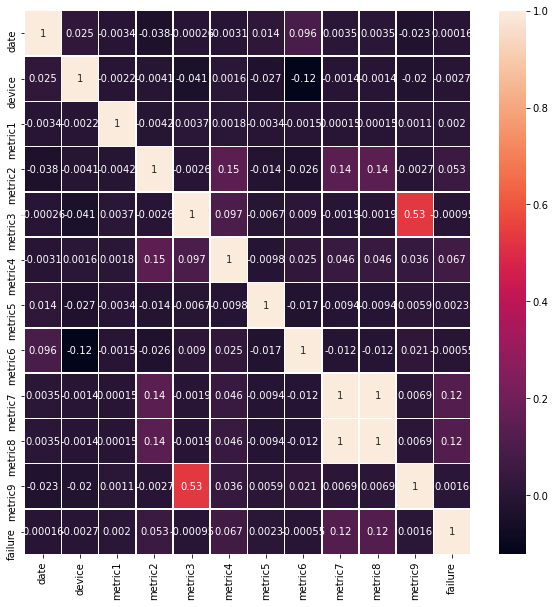

In [25]:
corr = mydata.corr()
#sns.heatmap(corr, annot=True)

fig, ax = plt.subplots(figsize=(10,10))         # Sample figsize in inches
sns.heatmap(corr, annot=True, linewidths=.5, ax=ax)

array([[<AxesSubplot:title={'center':'date'}>,
        <AxesSubplot:title={'center':'device'}>,
        <AxesSubplot:title={'center':'metric1'}>],
       [<AxesSubplot:title={'center':'metric2'}>,
        <AxesSubplot:title={'center':'metric3'}>,
        <AxesSubplot:title={'center':'metric4'}>],
       [<AxesSubplot:title={'center':'metric5'}>,
        <AxesSubplot:title={'center':'metric6'}>,
        <AxesSubplot:title={'center':'metric7'}>],
       [<AxesSubplot:title={'center':'metric8'}>,
        <AxesSubplot:title={'center':'metric9'}>,
        <AxesSubplot:title={'center':'failure'}>]], dtype=object)

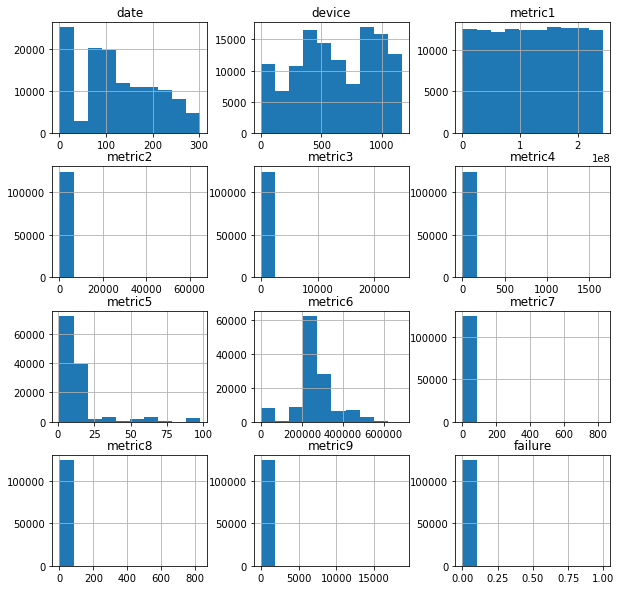

In [26]:
mydata.hist(figsize=(10,10))

In [27]:
# From the Histogram chart, only Device, Metric1 and Metric6 shows more or less the normal distribution and 
# rest of the attributes are mostly right skewed ones.

In [28]:
# Lets plot the boxplot to visualize quartile range and the outliers.

<AxesSubplot:xlabel='failure', ylabel='date'>

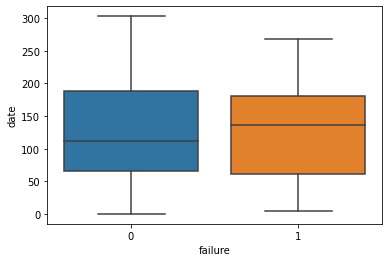

In [29]:
sns.boxplot(y="date",x="failure",data=mydata)

<AxesSubplot:xlabel='failure', ylabel='device'>

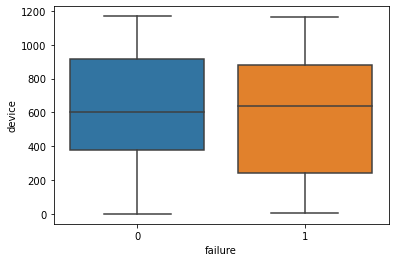

In [30]:
sns.boxplot(y="device",x="failure",data=mydata)

<AxesSubplot:xlabel='failure', ylabel='metric1'>

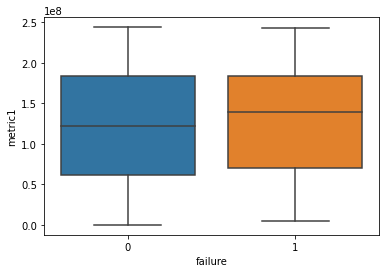

In [31]:
sns.boxplot(y="metric1",x="failure",data=mydata)

<AxesSubplot:xlabel='failure', ylabel='metric2'>

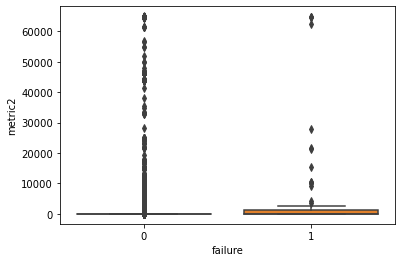

In [32]:
sns.boxplot(y="metric2",x="failure",data=mydata)

<AxesSubplot:xlabel='failure', ylabel='metric3'>

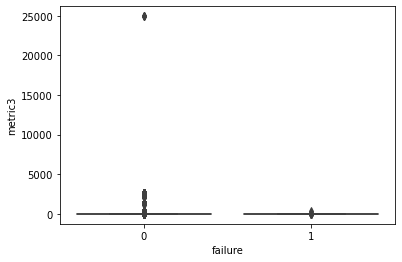

In [33]:
sns.boxplot(y="metric3",x="failure",data=mydata)

<AxesSubplot:xlabel='failure', ylabel='metric4'>

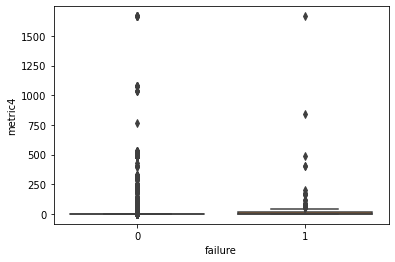

In [34]:
sns.boxplot(y="metric4",x="failure",data=mydata)

<AxesSubplot:xlabel='failure', ylabel='metric5'>

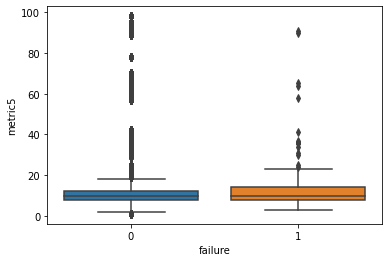

In [35]:
sns.boxplot(y="metric5",x="failure",data=mydata)

<AxesSubplot:xlabel='failure', ylabel='metric6'>

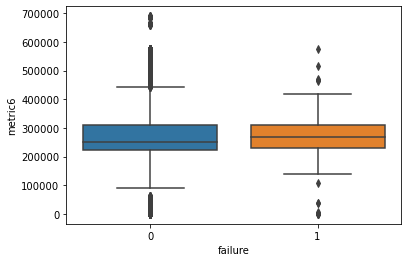

In [36]:
sns.boxplot(y="metric6",x="failure",data=mydata)

<AxesSubplot:xlabel='failure', ylabel='metric7'>

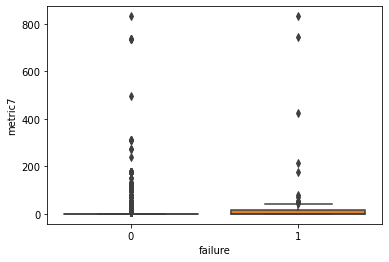

In [37]:
sns.boxplot(y="metric7",x="failure",data=mydata)

<AxesSubplot:xlabel='failure', ylabel='metric8'>

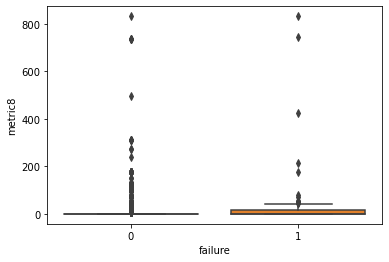

In [38]:
sns.boxplot(y="metric8",x="failure",data=mydata)

<AxesSubplot:xlabel='failure', ylabel='metric9'>

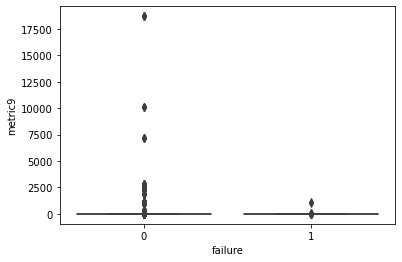

In [39]:
sns.boxplot(y="metric9",x="failure",data=mydata)

## Preventive Maintanence Dataset - Insight Summary:

In [40]:
# After performing the exploratory data analysis, the dataset  is imbalanced
# Date and Device columns are of type object, so converted the values to categorical
# We can able to find Device, Metric1 and Metric6 atributes have some what normal distribution, Other attributes are assymetrical
# There were no missing values in the dataset.
# There are many outliers in the dataset which are shown using Box plot graph..

## Model Buliding

### Building Model with OverSamping

failure 0: (124388, 12)
failure 1: (106, 12)
total failure of 1 and 0 :
 0    124388
1    124388
Name: failure, dtype: int64


<AxesSubplot:title={'center':'count (target)'}>

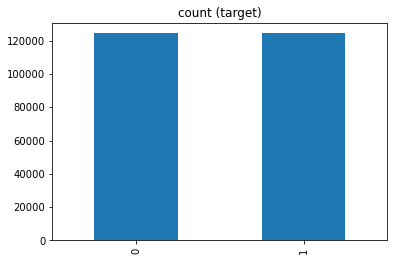

In [41]:
# class count
failure_count_0, failure_count_1 = mydata['failure'].value_counts()

# Separate class
failure_0 = mydata[mydata['failure'] == 0]
failure_1 = mydata[mydata['failure'] == 1] 

# print the shape of the class
print('failure 0:', failure_0.shape)
print('failure 1:', failure_1.shape)

failure_1_over = failure_1.sample(failure_count_0, replace=True)
test_over = pd.concat([failure_1_over, failure_0], axis=0)
print("total failure of 1 and 0 :\n", test_over['failure'].value_counts())
# plot the count after under-sampeling
test_over['failure'].value_counts().plot(kind='bar', title='count (target)')

In [110]:
#using Oversampled Dataset with ANN

In [64]:
#split dataset in features and target variable
feature_cols = ['metric1', 'metric2','metric3','metric4', 'metric5','metric6','metric7', 'metric8', 'metric9']
target_cols = ['failure']

X = test_over[feature_cols] # Features
Y = test_over[target_cols].values.ravel() # Target variable

#training and testing split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3, random_state = 0)

#feature scaling is an important and mandatory for ann process before modelling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)



In [65]:
#ANN - initializing
ann = tf.keras.models.Sequential()

In [66]:
#input layer
# 6 features
ann.add(tf.keras.layers.Dense(units=6, activation='relu'))
#hidden layer
ann.add(tf.keras.layers.Dense(units=6, activation='relu'))
#output layer
#as target value is binary - AF
ann.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))
#compiling
#loss - target is binary 
ann.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [67]:
#training set
ann.fit(X_train, y_train, batch_size = 32, epochs = 50)

Epoch 1/50
5442/5442 [==============================] - 11s 2ms/step - loss: 0.5015 - accuracy: 0.7482
Epoch 2/50
5442/5442 [==============================] - 9s 2ms/step - loss: 0.4077 - accuracy: 0.8073
Epoch 3/50
5442/5442 [==============================] - 8s 2ms/step - loss: 0.3670 - accuracy: 0.8377
Epoch 4/50
5442/5442 [==============================] - 9s 2ms/step - loss: 0.3406 - accuracy: 0.8505
Epoch 5/50
5442/5442 [==============================] - 8s 2ms/step - loss: 0.3292 - accuracy: 0.8550: 0s - loss:
Epoch 6/50
5442/5442 [==============================] - 8s 2ms/step - loss: 0.3237 - accuracy: 0.8564
Epoch 7/50
5442/5442 [==============================] - 8s 1ms/step - loss: 0.3203 - accuracy: 0.8574
Epoch 8/50
5442/5442 [==============================] - 9s 2ms/step - loss: 0.3177 - accuracy: 0.8585
Epoch 9/50
5442/5442 [==============================] - 9s 2ms/step - loss: 0.3160 - accuracy: 0.8590
Epoch 10/50
5442/5442 [==============================] - 11s 2ms/step

In [68]:
# prediction
y_pred = ann.predict(X_test)

In [69]:
#insted of values we ll get 0 or 1
y_pred = (y_pred > 0.5)
#actual vs prediicted outputs
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[0 0]
 [0 0]
 [1 1]
 ...
 [1 1]
 [1 1]
 [1 1]]


In [70]:
cnf_matrix = confusion_matrix(y_test, y_pred)
print ("Confustion Matrix")
print (cnf_matrix)
print("Accuracy :",accuracy_score(y_test, y_pred))
print("Precision:",precision_score(y_test, y_pred))
print("Recall   :",recall_score(y_test, y_pred))
print('F1 score :',f1_score(y_test, y_pred))

Confustion Matrix
[[34312  2965]
 [ 5567 31789]]
Accuracy : 0.8856805970549221
Precision: 0.9146860793002244
Recall   : 0.8509744083949031
F1 score : 0.8816807654971571


In [ ]:
Confustion Matrix
[[34077  3200]
 [ 2711 34645]]
Accuracy : 0.9207991103131322
Precision: 0.9154445765622936
Recall   : 0.9274279901488383
F1 score : 0.9213973218441244